# Breast Cancer Dignostic Analysis
The dataset contains 569 instances, each instance containing features obtained from a digitized image of a fine needle aspirate (FNA) of a breast mass. This study were performed in Wisconsin and the data related to this  study is freely available at UCI data library. You can find related data using the link mentioned in this notebook. The features in this study corresponds to 10 characteristics of the cell nuclei present in the image such as radius, texture, perimeter, smoothness, etc. Each instance contains a feature vector of length 30 where the first 10 entrieudy are the mean of the aforementioned characteristics, the next 10 entries are the standard deviation, and the last 10 are the largest values for each characteristic. Instances also have a label where 1 corresponds to a malignant tissue and 0 is a benign tissue. The dataset is split into a training, validation, and test sets.


In [1]:
#Load required libraries for analysis
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import io
import graphviz
import pydotplus
from scipy import misc
%matplotlib inline

### Let's load the dataset

In [2]:

df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data',header=None)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
0     569 non-null int64
1     569 non-null object
2     569 non-null float64
3     569 non-null float64
4     569 non-null float64
5     569 non-null float64
6     569 non-null float64
7     569 non-null float64
8     569 non-null float64
9     569 non-null float64
10    569 non-null float64
11    569 non-null float64
12    569 non-null float64
13    569 non-null float64
14    569 non-null float64
15    569 non-null float64
16    569 non-null float64
17    569 non-null float64
18    569 non-null float64
19    569 non-null float64
20    569 non-null float64
21    569 non-null float64
22    569 non-null float64
23    569 non-null float64
24    569 non-null float64
25    569 non-null float64
26    569 non-null float64
27    569 non-null float64
28    569 non-null float64
29    569 non-null float64
30    569 non-null float64
31    569 non-null float64
dtypes: float64(30), int64(1), obj

## Lets rename current feature names for better understnading

In [4]:
data=df.rename(columns={0:'Id',1:'Dignosis',2:'m_radius',3:'m_texture',4:'m_perimeter',5:'m_area',6:'m_smoothness',7:'m_compactness',
                     8:'m_concavity',9:'m_concave points',10:'m_symmetry',11:'m_fractal_dim',
                    12:'se_radius',13:'se_texture',14:'se_perimeter',15:'se_area',16:'se_smoothness',17:'se_compactness',
                     18:'se_concavity',19:'se_concave points',20:'se_symmetry',21:'se_fractal_dim',
                    22:'l_radius',23:'l_texture',24:'l_perimeter',25:'l_area',26:'l_smoothness',27:'l_compactness',
                     28:'l_concavity',29:'l_concave_points',30:'l_symmetry',31:'l_fractal_dim'})

# Database Feature Information

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)

The mean(m_), standard error(se_), and "worst" or largest(l_) (mean of the three
largest values) of these features were computed for each image,resulting in 30 features.  

For example, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.
##### Let's check the new feature names of dataset

In [5]:
data.tail(5)

,Id,Dignosis,m_radius,m_texture,m_perimeter,m_area,m_smoothness,m_compactness,m_concavity,m_concave points,...,l_radius,l_texture,l_perimeter,l_area,l_smoothness,l_compactness,l_concavity,l_concave_points,l_symmetry,l_fractal_dim
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


#### This study is performed to understand the relationship between cell nuclie features and resulted dignosis of breast cancer.
#### Before starting our analysis, it is important to know the distribution of diagnostic cases.

In [6]:
data.groupby('Dignosis')['Id'].nunique()

Dignosis
B    357
M    212
Name: Id, dtype: int64

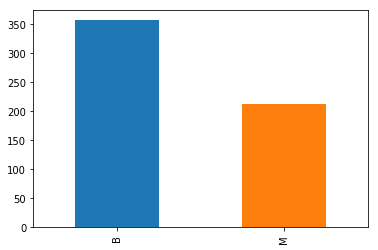

In [7]:
data['Dignosis'].value_counts().plot('bar')

### Lets check value range and distribution for every feature. Also lets check if there is any significant difference in the range of values with respect to dignosis. Right now, lets restrict our analysis to mean values of all features.

#### In all the following boxplot-
#### 1- M (Malignant)
#### 2- B (Benign) 

Text(0.5, 1.0, 'Histogram of Radius values')

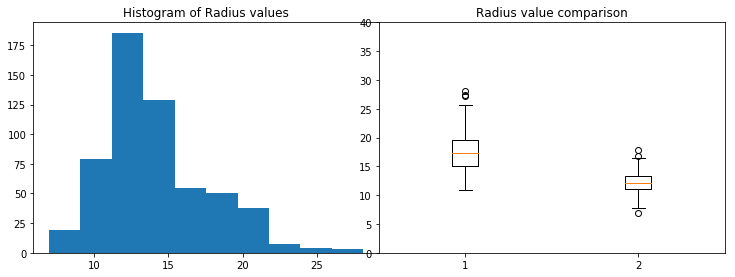

In [8]:
fig=plt.figure()
ax1=fig.add_axes([0.1,0.1,0.8,0.8])
ax2=fig.add_axes([0.9,0.1,0.8,0.8])
ax2.set_ylim([0,40])

ax1.hist(data['m_radius'],bins=10,histtype='barstacked')
ax2.boxplot([data[data['Dignosis']=='M']['m_radius'],data[data['Dignosis']=='B']['m_radius']])

ax2.set_title("Radius value comparison")
ax1.set_title("Histogram of Radius values")



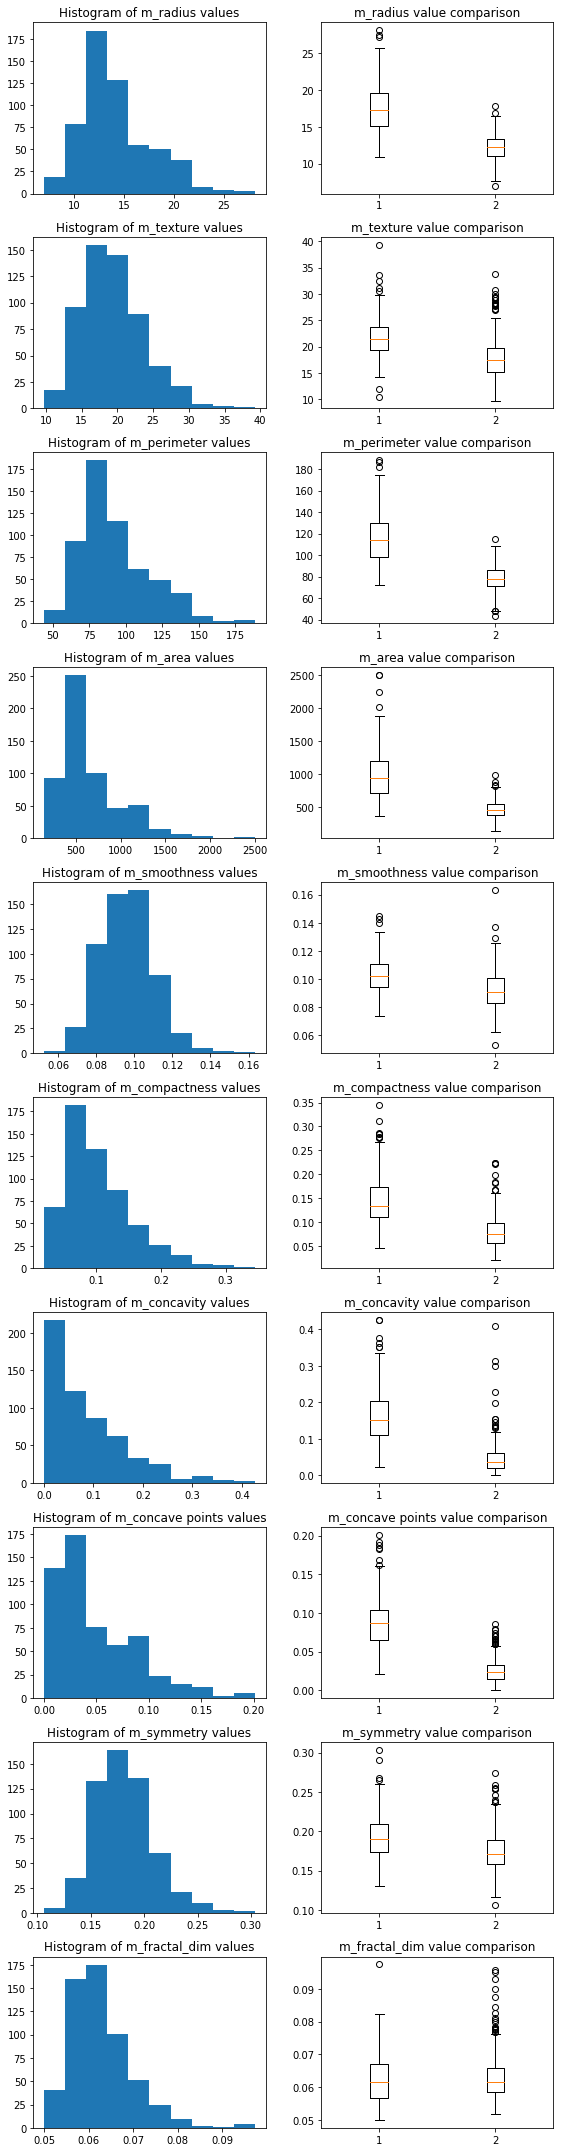

In [9]:
fig8 = plt.figure(figsize=(8,30))
ax=[]
a=1
gs = gridspec.GridSpec(10, 2,width_ratios=[1,1], height_ratios=[1 for i in range(10)] )

for i in range(2,12,1):
    #ax.append('ax'+ str(a))
    #ax.append('ax'+ str(a+1))
    col= data.columns[i]
    
    ax1 = fig8.add_subplot(gs[a-1],)
    ax2 = fig8.add_subplot(gs[a])
    
    ax1.hist(data[col],bins=10,histtype='barstacked')
    ax2.boxplot([data[data['Dignosis']=='M'][col],data[data['Dignosis']=='B'][col]])
   
    ax1.set_title("Histogram of "+ col + " values")
    ax2.set_title(col+ " value comparison")
    
    a=a+2
plt.tight_layout()

#### Analysis
From above box plots we can see that features like radius, Perimeter, area, compactness, concavity , concave point 
have distinctively different range of values 

#### Let's now consider the feature interaction 
* Blue- Malignant dignosis 
* Orange- Benign dignosis

C:\Users\aakas\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


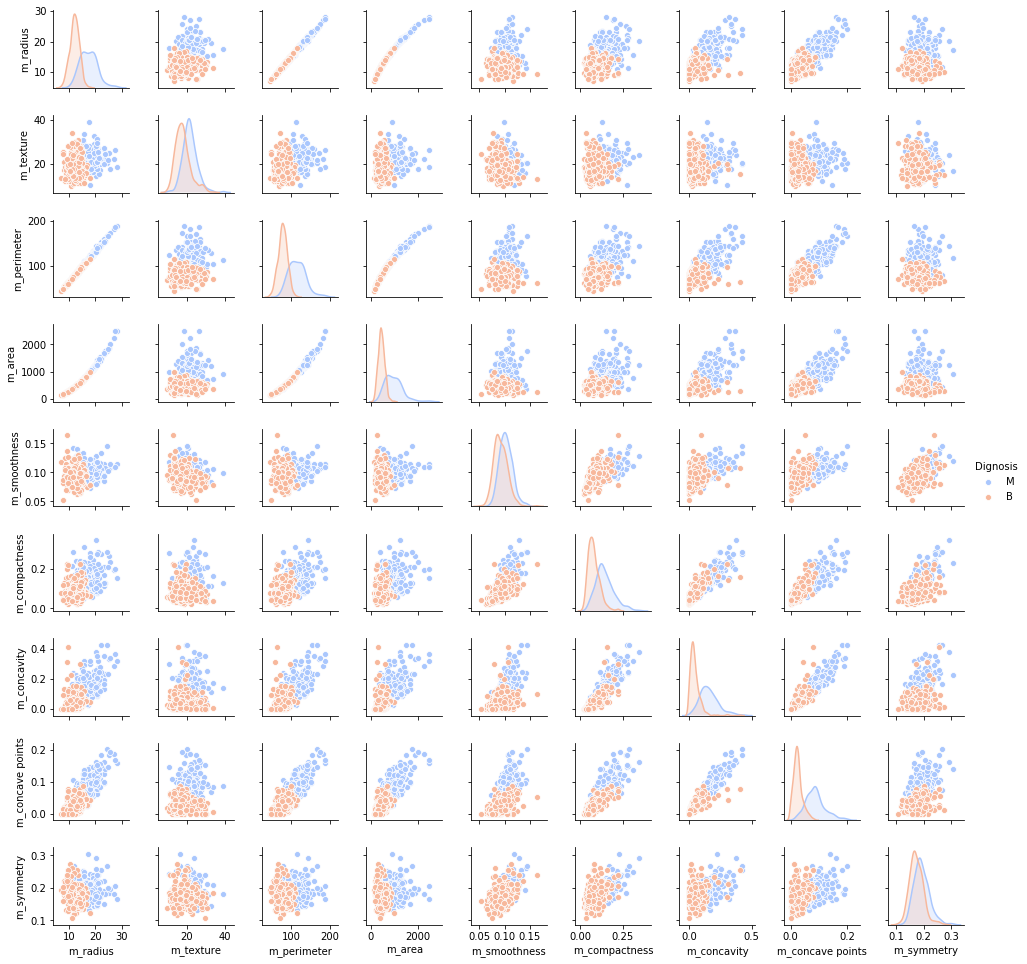

In [10]:
sns.pairplot(data.iloc[:,1:11],hue='Dignosis',palette='coolwarm', height=1.5)

###  Analysis
From the above plots we can say that-
1. In genral cases cells with malignant dignosis are bigger in size than benign.
2. In genral cases cells with malignant dignosis are more concave in size than benign.
3. There is not significant differnce in smoothness and texure of cell. However, Standard daviation of gray scale values (Texure) are slightly more for Malignant dignosis. Also, The smoothness values are slightly more for Malignant dignosis.
4. Overall features related to shape of cells provide more information in comparison to texure and smoothness of cells. 

** From above plots we can see that several combinations are useful to explain the dignosis of breast cancer, however there is an overlap of values at the boundry line.Thus, we need to look into more factors.   


### Let's see the corelation values using heat plot

<function matplotlib.pyplot.show(*args, **kw)>

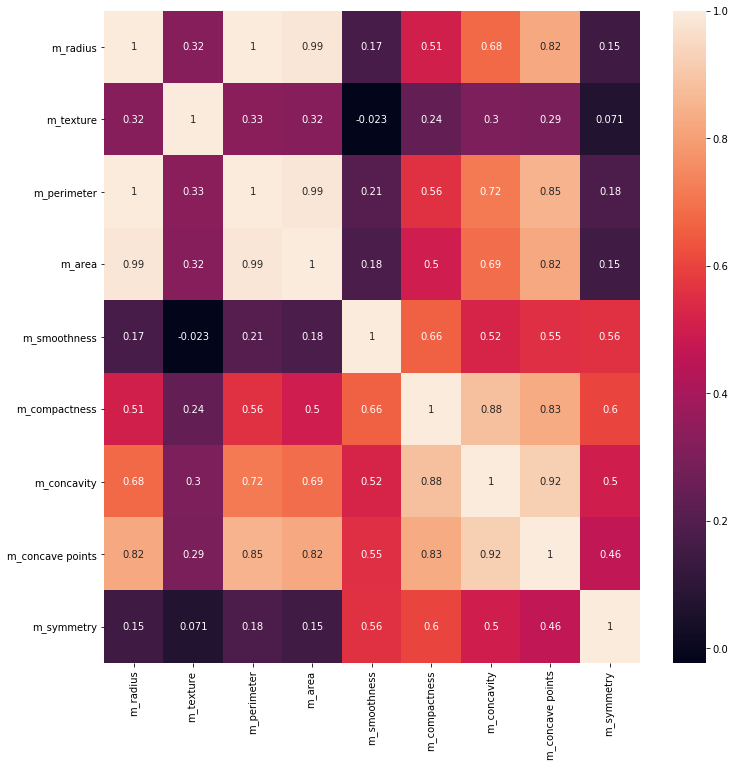

In [11]:
temp_df=data.iloc[:,2:11]

corr=temp_df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)
plt.show

### Analysis
From the above plot we can clearly see that number of variables are closely related.

## Lets separeate target and predictor variables.

In [12]:
X=data.iloc[:,2:]
Y=data['Dignosis']

In [13]:
#def Y_to_numeric(x):
 #   if x=='M':
  #      return 1
   # if x=='B':
    #    return 2

In [14]:
#Y=Y.apply(Y_to_numeric)

 ***Lets split data***

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_val,Y_train,Y_val=train_test_split(X,Y,train_size=0.7,random_state=1)

C:\Users\aakas\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


# function to display decison tree

In [17]:
def show_tree(tree,features,path):
    file=io.StringIO()
    export_graphviz(tree,out_file=file,feature_names=X.columns)
    pydotplus.find_graphviz()
    pydotplus.graph_from_dot_data(file.getvalue()).write_png(path)
    img=misc.imread(path)
    plt.rcParams["figure.figsize"]=(20,20)
    plt.imshow(img)
    

# Decision Tree Model 1

In [18]:
clf1=DecisionTreeClassifier(criterion='gini',random_state=1)
tree1=clf1.fit(X_train,y=Y_train)

C:\Users\aakas\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


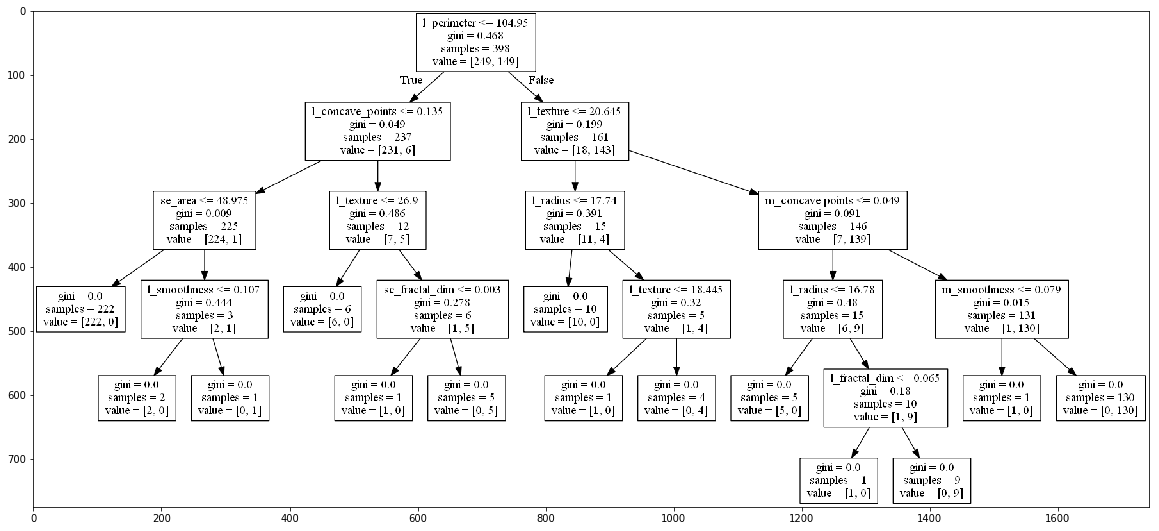

In [19]:
show_tree(tree1,X.columns,'dec_tree1.png')

In [20]:
Y_predict=tree1.predict(X_val)
print('accuracy score of Decision tree 1 is',accuracy_score(Y_val,Y_predict))

accuracy score of Decision tree 1 is 0.9298245614035088


# Dicision Tree Model 2

In [21]:
clf2=DecisionTreeClassifier(criterion='gini',max_depth=10,random_state=1)
tree2=clf2.fit(X_train,y=Y_train)

In [22]:
Y_predict=tree2.predict(X_val)
print('accuracy score of Decision tree 1 is',accuracy_score(Y_val,Y_predict))

accuracy score of Decision tree 1 is 0.9298245614035088


# Decision Tree Model 3

In [23]:
clf3=DecisionTreeClassifier(criterion='gini',min_samples_leaf=3,max_depth=10,random_state=1)
tree3=clf3.fit(X_train,y=Y_train)

In [24]:
Y_predict=tree3.predict(X_val)
print('accuracy score of Decision tree 1 is',accuracy_score(Y_val,Y_predict))

accuracy score of Decision tree 1 is 0.9590643274853801


C:\Users\aakas\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


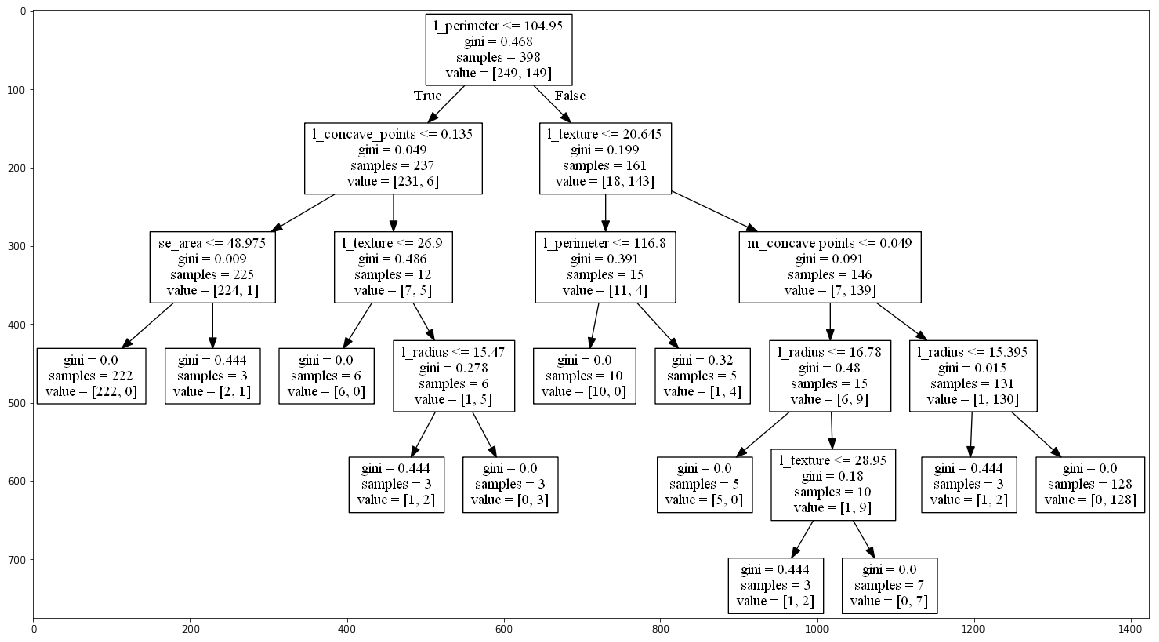

In [25]:
show_tree(tree3,X.columns,'dec_tree3.png')

A Decision tree is drawn upside down with its root at the top. Based on which model splits further.Each parent node represent condition of split. In the tree above **6** features are considered for spliting condition namely **l_perimeter, l_concove_point, l_texture, se_area, m_concave_point, l_radius ** 
Gini criterion is used for decision tree.

Tree can easily be interpreted by considering condition at each node.
e.g Lets consider the bottom left most node.Here [222,0]represents number of observations reached to this node i.e. 222 observations with 
**M** class reached to this node. Which has following attritubutes
1.se_area<=18.975
2.l_concave_oint<=0.135
3.l_perimeter<=104.95

Similarly, we can interpret all other nodes from above tree.
best accuracy of 95.90% is obtained for model with parameters 
as maximum_depth=10, and min_samples_leaf=3.



# Random Forest

## Case 1: Random Forest with different number of decision trees

In [26]:
Rf1=RandomForestClassifier(criterion='gini',random_state=0)
Forest1=Rf1.fit(X_train,Y_train)

C:\Users\aakas\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [27]:
Y_predict=Rf1.predict(X_val)
print('accuracy score of Random Forest 1 is',accuracy_score(Y_val,Y_predict))

accuracy score of Random Forest 1 is 0.9298245614035088


In [28]:
#tree = Rf.estimators_[1]
#show_tree(tree,X.columns,'Random_forest1.png')

In [29]:
Rf2=RandomForestClassifier(criterion='gini',n_estimators=10,random_state=0)
Forest2=Rf2.fit(X_train,Y_train)
Y_predict=Rf2.predict(X_val)
print('accuracy score of Random Forest 2 is',accuracy_score(Y_val,Y_predict))

accuracy score of Random Forest 2 is 0.9298245614035088


In [30]:
Rf3=RandomForestClassifier(criterion='gini',n_estimators=50,random_state=0)
Forest3=Rf3.fit(X_train,Y_train)
Y_predict=Rf3.predict(X_val)
print('accuracy score of Random Forest 3 is',accuracy_score(Y_val,Y_predict))

accuracy score of Random Forest 3 is 0.9415204678362573


## Case 2: Same Number of trees with max_depth and min_samples_leaf as selected in part (a)

In [31]:
Rf4=RandomForestClassifier(criterion='gini',n_estimators=10,max_depth=10,min_samples_leaf=4,random_state=0)
Forest4=Rf4.fit(X_train,Y_train)
Y_predict=Rf4.predict(X_val)
print('accuracy score of Random Forest 1 is',accuracy_score(Y_val,Y_predict))

accuracy score of Random Forest 1 is 0.935672514619883


C:\Users\aakas\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


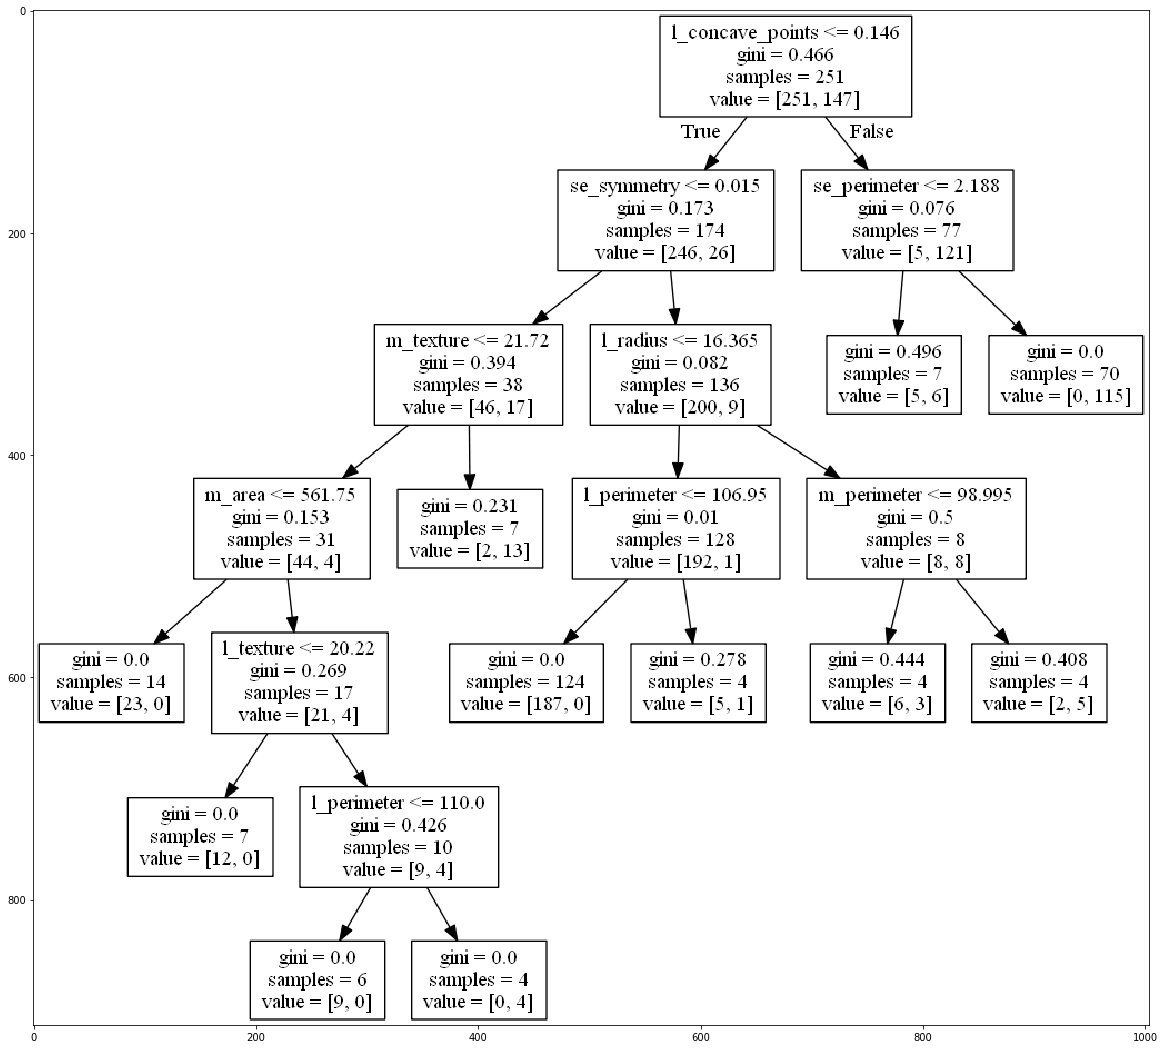

In [32]:
Dtree = Rf4.estimators_[4]
show_tree(Dtree,X.columns,'RF_Decision_Tree1.png')

In [33]:
Rf5=RandomForestClassifier(criterion='gini',n_estimators=50,max_depth=10,min_samples_leaf=4,random_state=0)
Forest5=Rf5.fit(X_train,Y_train)
Y_predict=Rf5.predict(X_val)
print('accuracy score of Random Forest 1 is',accuracy_score(Y_val,Y_predict))

accuracy score of Random Forest 1 is 0.9415204678362573


C:\Users\aakas\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


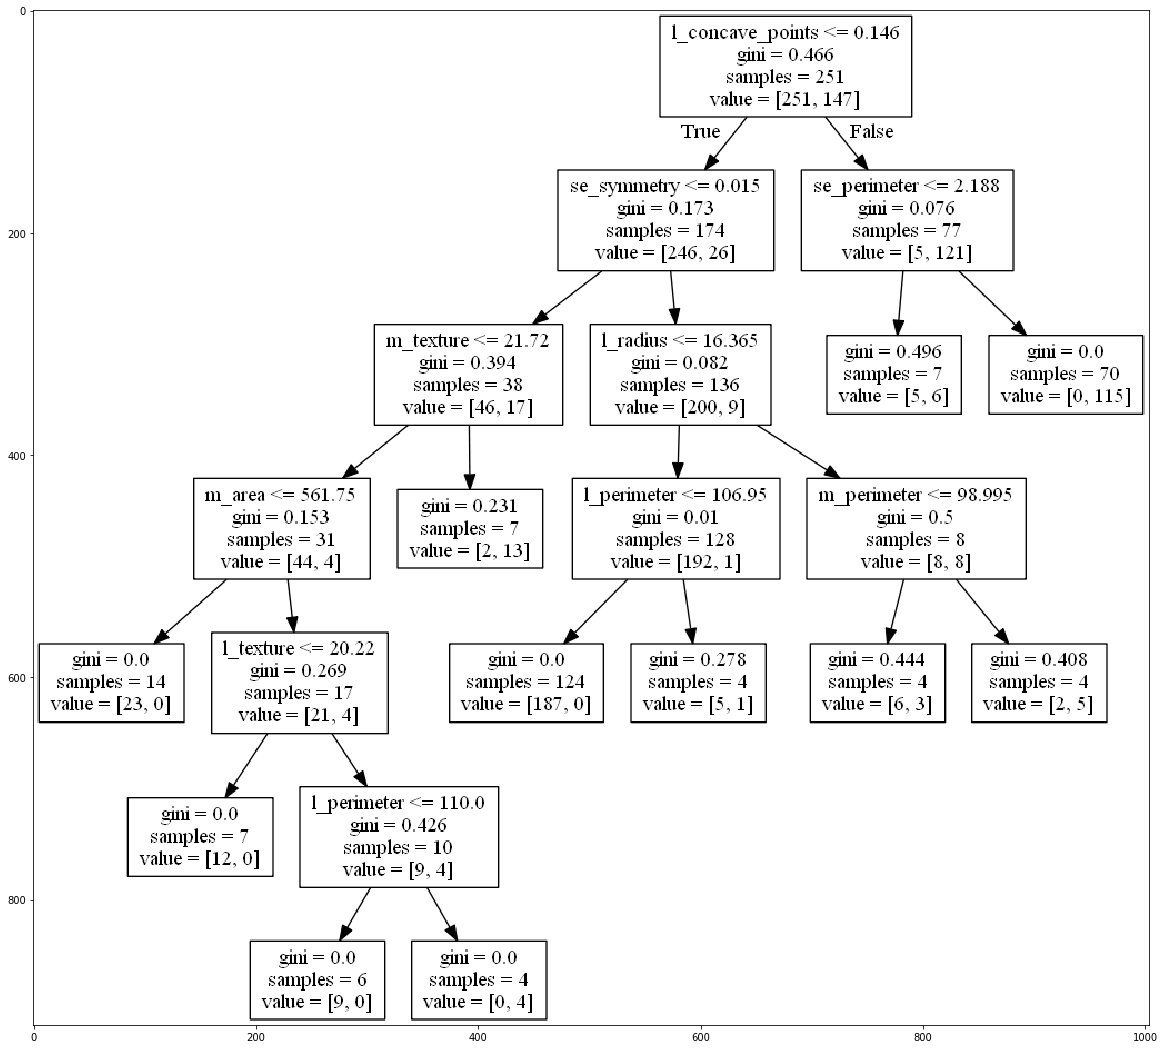

In [34]:
Dtree2 = Rf5.estimators_[4]
show_tree(Dtree2,X.columns,'RF_Decision_Tree2.png')

After trying various combinations, I am able to achieve **94.15 %** with following parameters 
n_estimators=50,
max_depth=10,
min_sample_leaf=4

